## Part b): Adding Ridge regression for the Franke function

In [ ]:
#Using a standardized dataset 
np.random.seed(2024)

x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
z = FrankeFunction(x, y)

#Creating lambda values avoiding "b" x.Tin the name as it is a reserved keyword in python
#lamda = [1, 10, 100, 1000, 10000]
lamda = [0.0001,0.001,0.01,0.1,1.0]



In [ ]:


beta_Ridge_values = []
mse_Ridge_scores = []
r2_Ridge_scores = []

# Looping through each lambda
for i in range(np.size(lamda)):
    # Polynomial degrees
    degrees = np.arange(0, 5)

    # Appending lists to store scores and parameters
    beta_Ridge_values.append([])
    mse_Ridge_scores.append([])
    r2_Ridge_scores.append([])


    # Looping through each degree
    for degree in degrees:
        # Creating design matrix
        X = create_design_matrix(x, degree)
        I = np.eye(degree+1)
        betaRidge =  np.linalg.inv(X.T @ X + I*lamda[i]) @ X.T @ z
        beta_Ridge_values[i].append(betaRidge)
        mse_Ridge_scores[i].append(np.mean((z - X @ betaRidge)**2))
        r2_Ridge_scores[i].append(1 - (np.sum((z - X @ betaRidge)**2) / np.sum((z - np.mean(z))**2)))



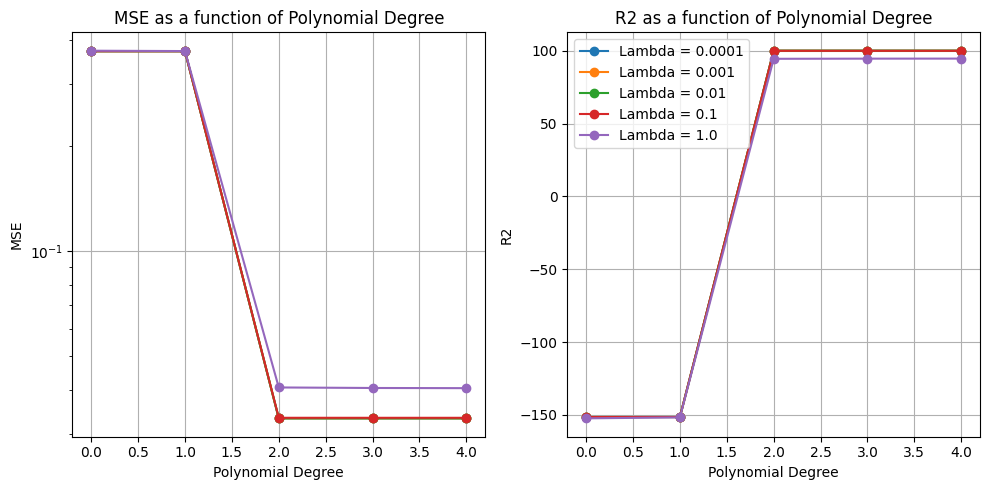

In [ ]:
# Plotting MSE and R2 scores
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.title('MSE as a function of Polynomial Degree')
plt.grid()

plt.subplot(1, 2, 2)
plt.xlabel('Polynomial Degree')
plt.ylabel('R2')
plt.title('R2 as a function of Polynomial Degree')
plt.grid()

r2_Ridge_scores = (np.array(r2_Ridge_scores)/np.max(r2_Ridge_scores))*100

for j in range(np.size(lamda)):
    plt.subplot(1, 2, 1)
    plt.semilogy(degrees, mse_Ridge_scores[j], marker='o', label=f'Lambda = {lamda[j]}')
    plt.subplot(1, 2, 2)
    plt.plot(degrees, r2_Ridge_scores[j], marker='o', label=f'Lambda = {lamda[j]}')

plt.tight_layout()
plt.legend(loc='upper left')
plt.show()

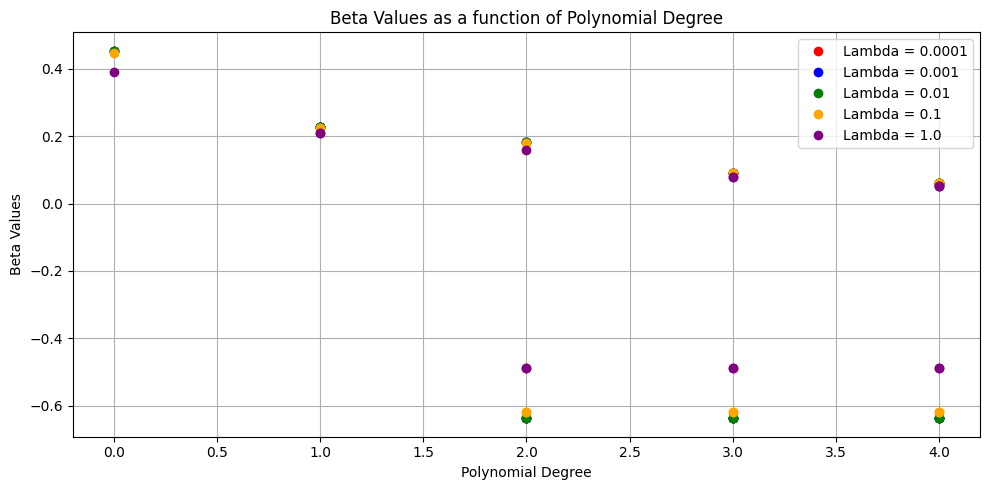

In [ ]:
# Plotting beta values
plt.figure(figsize=(10, 5))
plt.xlabel('Polynomial Degree')
plt.ylabel('Beta Values')
plt.title('Beta Values as a function of Polynomial Degree')
plt.grid()

colors = ['red', 'blue', 'green', 'orange', 'purple']  # Define colors for each lambda


for i in range(len(beta_Ridge_values)):
    for j in range(len(beta_Ridge_values[i])):
        for k in range(len(beta_Ridge_values[i][j])):
            beta_i = beta_Ridge_values[i][j][k]
            plt.plot(degrees[j]*np.ones_like(beta_Ridge_values[i][j][k]), beta_Ridge_values[i][j][k], marker='o', color=colors[i], label= f'Lambda = {lamda[i]}' if k == 0 else None)  # Use color based on lambda

plt.tight_layout()
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=f'Lambda = {lamda[i]}', markerfacecolor=colors[i], markersize=8) for i in range(len(lamda))])
plt.show()


We can see that the beta values are approximating zero with higher polynomial order. 